In [2]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import PolynomialFeatures


In [3]:
df_train = pd.read_csv('.\\data\\custom_prep\\train.csv')
df_test = pd.read_csv('.\\data\\custom_prep\\test.csv')
df_val = pd.read_csv('.\\data\\custom_prep\\val.csv')

print(df_train.shape, df_test.shape, df_val.shape)

(2277620, 33) (2277625, 33) (1138815, 33)


In [4]:
# reshuffle train_set
df_train = df_train.sample(frac=1)

In [5]:
# features -> X
# outcome -> y
X_train = df_train.drop(['id_1', 'id_2', 'match'], axis=1)
y_train = df_train['match']

X_test = df_test.drop(['id_1', 'id_2', 'match'], axis=1)
y_test = df_test['match']

In [6]:
from pickle import dump

In [7]:
# scale X_train
scaler = MinMaxScaler()
scaler.fit(X_train)

dump(scaler, open('scaler.pkl', 'wb'))

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Try Logistic Regression with default parameters
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

# Test
y_pred = log_reg.predict(X_test)



In [8]:
log_reg_accuracy = accuracy_score(y_test, y_pred)
log_reg_presision = precision_score(y_test, y_pred)
log_reg_recall = recall_score(y_test, y_pred)
log_reg_bal_acc = balanced_accuracy_score(y_test, y_pred)
print(log_reg_accuracy, log_reg_bal_acc, log_reg_presision, log_reg_recall)

0.9643501454365841 0.9455379796025734 0.9450602525574028 0.9083831515214039


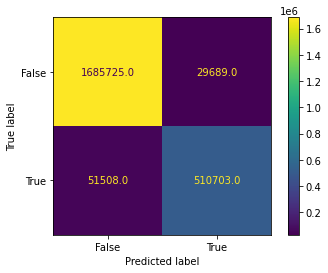

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='.1f')

In [10]:
y_pred_train = log_reg.predict(X_train)

In [11]:
log_reg_accuracy_train = accuracy_score(y_train, y_pred_train)
log_reg_presision_train = precision_score(y_train, y_pred_train)
log_reg_recall_train = recall_score(y_train, y_pred_train)
log_reg_bal_acc_train = balanced_accuracy_score(y_train, y_pred_train)
print(log_reg_accuracy_train, log_reg_bal_acc_train, log_reg_presision_train, log_reg_recall_train)

0.9643188942843846 0.945451137269623 0.9453264710940809 0.9081433421511271


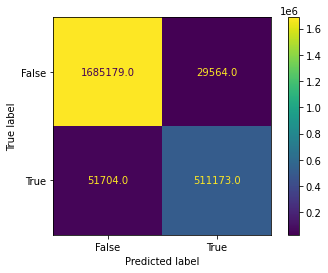

In [12]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, values_format='.1f')

In [14]:
mul_reg = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg')
mul_reg.fit(X_train, y_train)

# Test
y_pred = mul_reg.predict(X_test)
y_pred_train = mul_reg.predict(X_train)

In [15]:
mul_reg_accuracy_train = accuracy_score(y_train, y_pred_train)
mul_reg_presision_train = precision_score(y_train, y_pred_train)
mul_reg_recall_train = recall_score(y_train, y_pred_train)
mul_reg_bal_acc_train = balanced_accuracy_score(y_train, y_pred_train)
print(mul_reg_accuracy_train, mul_reg_bal_acc_train, mul_reg_presision_train, mul_reg_recall_train)

0.9643000149278633 0.9455304914635753 0.9449978561712697 0.9084169365598523


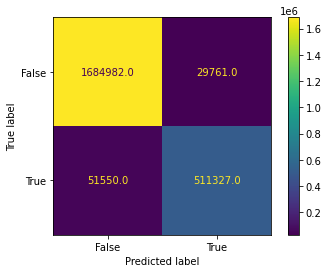

In [17]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, values_format='.1f')

In [18]:
mul_reg_accuracy = accuracy_score(y_test, y_pred)
mul_reg_presision = precision_score(y_test, y_pred)
mul_reg_recall = recall_score(y_test, y_pred)
mul_reg_bal_acc = balanced_accuracy_score(y_test, y_pred)
print(mul_reg_accuracy, mul_reg_bal_acc, mul_reg_presision, mul_reg_recall)

0.9643475111135503 0.9456330858535589 0.9447830863179231 0.9086712995654657


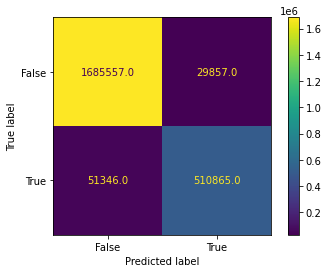

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='.1f')

In [22]:
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)
X_poly.shape

(2277620, 495)

In [31]:
lr_poly = LogisticRegression(max_iter=1000)
lr_poly.fit(X_poly, y_train)

d:\Python-projects\Kaggle\Foursquare_Location_Matching\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [32]:
lr_poly.score(poly.transform(X_test), y_test)

0.9697434827945777

In [33]:
lr_poly.score(X_poly, y_train)

0.969595893959484

In [34]:
# Test
y_pred = lr_poly.predict(poly.transform(X_test))
y_pred_train = lr_poly.predict(poly.transform(X_train))

In [35]:
pol_reg_accuracy_train = accuracy_score(y_train, y_pred_train)
pol_reg_presision_train = precision_score(y_train, y_pred_train)
pol_reg_recall_train = recall_score(y_train, y_pred_train)
pol_reg_bal_acc_train = balanced_accuracy_score(y_train, y_pred_train)
print(pol_reg_accuracy_train, pol_reg_bal_acc_train, pol_reg_presision_train, pol_reg_recall_train)

0.969595893959484 0.9526911151882328 0.9560175006189514 0.9192647772070985


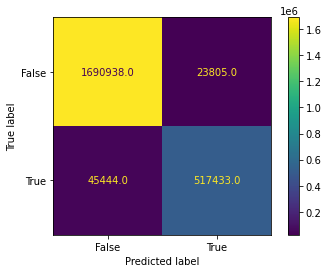

In [36]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, values_format='.1f')

In [37]:
pol_reg_accuracy = accuracy_score(y_test, y_pred)
pol_reg_presision = precision_score(y_test, y_pred)
pol_reg_recall = recall_score(y_test, y_pred)
pol_reg_bal_acc = balanced_accuracy_score(y_test, y_pred)
print(pol_reg_accuracy, pol_reg_bal_acc, pol_reg_presision, pol_reg_recall)

0.9697434827945777 0.9529083605742774 0.9560935379244285 0.9196582777640423


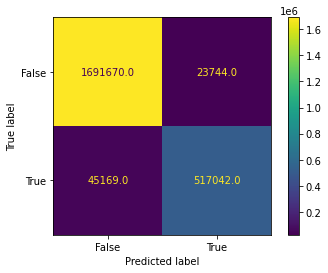

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='.1f')

### To compare different algorithm, check here: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

### Try CatBoost

In [6]:
from catboost import CatBoostClassifier

In [7]:
cat_model = CatBoostClassifier()

cat_model.fit(X_train, y_train)

Learning rate set to 0.279627
0:	learn: 0.2550249	total: 341ms	remaining: 5m 40s
1:	learn: 0.1455639	total: 638ms	remaining: 5m 18s
2:	learn: 0.1112583	total: 899ms	remaining: 4m 58s
3:	learn: 0.0991086	total: 1.16s	remaining: 4m 49s
4:	learn: 0.0921615	total: 1.46s	remaining: 4m 50s
5:	learn: 0.0896920	total: 1.7s	remaining: 4m 41s
6:	learn: 0.0869605	total: 1.93s	remaining: 4m 33s
7:	learn: 0.0855939	total: 2.21s	remaining: 4m 33s
8:	learn: 0.0845237	total: 2.56s	remaining: 4m 41s
9:	learn: 0.0837744	total: 2.77s	remaining: 4m 34s
10:	learn: 0.0831367	total: 3.02s	remaining: 4m 31s
11:	learn: 0.0825713	total: 3.28s	remaining: 4m 30s
12:	learn: 0.0821142	total: 3.51s	remaining: 4m 26s
13:	learn: 0.0814324	total: 3.75s	remaining: 4m 24s
14:	learn: 0.0807159	total: 4.01s	remaining: 4m 23s
15:	learn: 0.0803392	total: 4.24s	remaining: 4m 21s
16:	learn: 0.0800747	total: 4.54s	remaining: 4m 22s
17:	learn: 0.0796623	total: 4.77s	remaining: 4m 20s
18:	learn: 0.0792547	total: 4.98s	remaining: 

In [8]:
# Test
y_pred = cat_model.predict(X_test)
y_pred_train = cat_model.predict(X_train)

In [9]:
cat_model.save_model('catboost2406')

In [10]:
y_pred_train = (y_pred_train == 'True')
y_pred = (y_pred == 'True')


In [11]:
cat_reg_accuracy_train = accuracy_score(y_train, y_pred_train)
cat_reg_presision_train = precision_score(y_train, y_pred_train)
cat_reg_recall_train = recall_score(y_train, y_pred_train)
cat_reg_bal_acc_train = balanced_accuracy_score(y_train, y_pred_train)
print(cat_reg_accuracy_train, cat_reg_bal_acc_train, cat_reg_presision_train, cat_reg_recall_train)

0.9811610365205785 0.9679750686605577 0.9811133255980503 0.9419020496485022


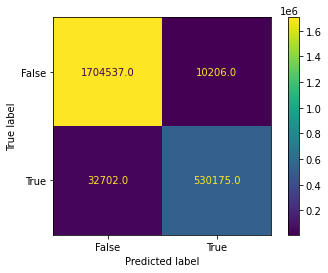

In [12]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, values_format='.1f')

In [13]:
cat_reg_accuracy = accuracy_score(y_test, y_pred)
cat_reg_presision = precision_score(y_test, y_pred)
cat_reg_recall = recall_score(y_test, y_pred)
cat_reg_bal_acc = balanced_accuracy_score(y_test, y_pred)
print(cat_reg_accuracy, cat_reg_bal_acc, cat_reg_presision, cat_reg_recall)

0.9759310685472806 0.9605393690488419 0.9711335075276845 0.930140107539696


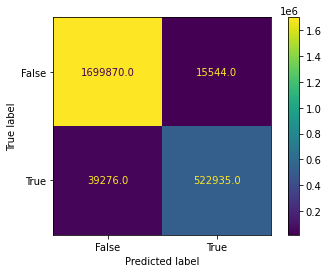

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='.1f')